# Setting up the data csv

In [1]:
import os

import librosa
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset_folder_path = "/hdd/AGAC/AGAC2_datasets/audios/"
dataset_name = "HULSIL2"

In [3]:
real_path = os.path.join(dataset_folder_path, dataset_name, "clean_data", "real")
real_wavs = os.listdir(real_path)
real_dataframe_values = []

corrupted_files = []
for wav_file in tqdm(real_wavs):
    file_path = os.path.join(real_path, wav_file)
    try:
        data, samplerate = librosa.load(file_path)
        audio_length = len(data) // samplerate
        real_dataframe_values.append([file_path, samplerate, len(data), audio_length])
    except:
        corrupted_files.append(file_path)

real_dataframe = pd.DataFrame(columns=["path", "sample_rate", "total_sample_number", "seconds"], data=real_dataframe_values)
real_dataframe.to_csv(os.path.join(dataset_folder_path, dataset_name, "clean_data", "real.csv"), index=False)

0it [00:00, ?it/s]


In [4]:
print(corrupted_files)

[]


In [5]:
for file in corrupted_files:
    os.remove(file)

In [6]:
fake_path = os.path.join(dataset_folder_path, dataset_name, "clean_data", "fake")
fake_wavs = os.listdir(fake_path)
fake_dataframe_values = []

corrupted_files = []
for wav_file in tqdm(fake_wavs):
    file_path = os.path.join(fake_path, wav_file)
    try:
        data, samplerate = librosa.load(file_path)
        audio_length = len(data) // samplerate
        fake_dataframe_values.append([file_path, samplerate, len(data), audio_length])
    except:
        corrupted_files.append(file_path)

fake_dataframe = pd.DataFrame(columns=["path", "sample_rate", "total_sample_number", "seconds"], data=fake_dataframe_values)
fake_dataframe.to_csv(os.path.join(dataset_folder_path, dataset_name, "clean_data", "fake.csv"), index=False)

100%|██████████| 1200/1200 [00:03<00:00, 323.50it/s]


In [7]:
print(corrupted_files)

[]


In [8]:
for file in corrupted_files:
    os.remove(file)

In [9]:
real_df = pd.read_csv(os.path.join(dataset_folder_path, dataset_name, "clean_data", "real.csv"))
fake_df = pd.read_csv(os.path.join(dataset_folder_path, dataset_name, "clean_data", "fake.csv"))

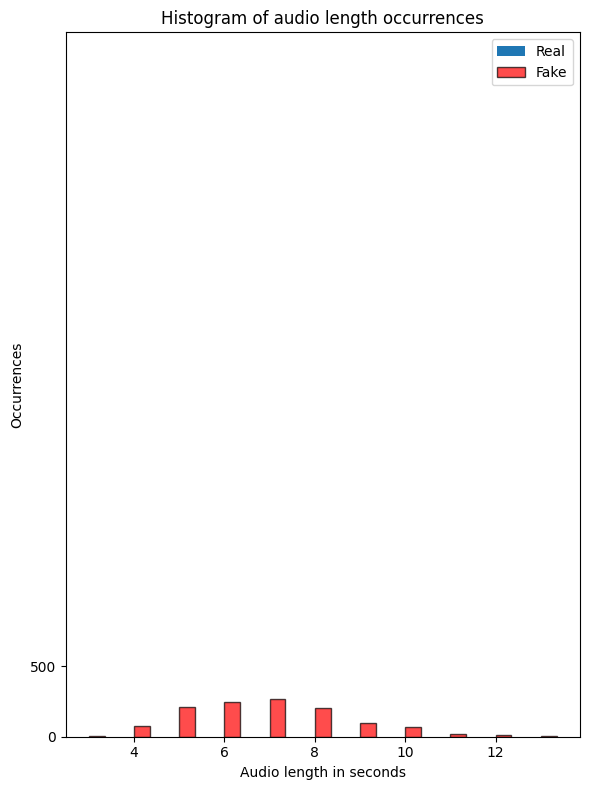

In [10]:
real_seconds_occurance = real_df["seconds"].value_counts().sort_index()
fake_seconds_occurance = fake_df["seconds"].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(6, 8))

bar_width = 0.35
bar_positions_real = real_seconds_occurance.index - bar_width/2
bar_positions_fake = fake_seconds_occurance.index + bar_width/2

ax.bar(bar_positions_real, real_seconds_occurance, width=bar_width, color='green', alpha=0.7, label='Real', edgecolor='black')
ax.bar(bar_positions_fake, fake_seconds_occurance, width=bar_width, color='red', alpha=0.7, label='Fake', edgecolor='black')

ax.set_xlabel('Audio length in seconds')
ax.set_ylabel('Occurrences')
ax.set_title('Histogram of audio length occurrences')
ax.set_ylim(0, 5000)
ax.set_yticks(range(0, int(max(0, real_seconds_occurance.max(), fake_seconds_occurance.max())) + 500, 500))
ax.legend()

plt.tight_layout()
plt.show()
